In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pickle

In [6]:
data = pd.read_csv(r'C:\\github\\broadband-capstone\\data\\current_data\\train_3.csv')
data = data.set_index('tract_geoid')
data = data.loc[:,data.dtypes =='float64']
data=data.dropna(how='any', axis = 1)
data.head()

,MaxAdDown,MaxAdUp,Wired_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,Wired_Provider_Count_25,Satellite_Provider_Count_25,Fixed_Wireless_Provider_Count_100,...,log_median_income,log_median_house_value,median_income_over_median_rent,median_income_over_median_house_value,pct_of_internet_users_with_broadband,log_median_income_over_log_median_house,pct_desktop_or_laptop,pct_smartphone,pct_only_smartphone,pct_tablet
tract_geoid,,,,,,,,,,,,,,,,,,,,,
6099000201,1000.0,1000.0,4.0,4.0,7.0,3.0,3.0,2.0,2.0,0.0,...,11.172546,12.667918,59.341118,0.224165,100.000000,0.881956,68.284076,80.811645,14.292016,54.741950
47125102002,1000.0,1000.0,3.0,0.0,5.0,4.0,0.0,3.0,2.0,0.0,...,11.113224,12.048249,51.697764,0.392576,99.164439,0.922393,96.990074,93.948127,1.953250,79.090618
22019001300,1000.0,1000.0,3.0,2.0,4.0,2.0,0.0,2.0,2.0,0.0,...,11.162147,12.062779,66.303202,0.406313,100.000000,0.925338,84.889780,85.611222,6.012024,68.777555
18083955400,1000.0,1000.0,5.0,3.0,6.0,3.0,1.0,3.0,2.0,0.0,...,10.388995,11.202316,50.940439,0.443383,100.000000,0.927397,65.481172,75.418410,10.564854,52.301255
39085206600,1000.0,1000.0,3.0,0.0,4.0,2.0,0.0,2.0,2.0,0.0,...,10.900178,11.663928,51.507605,0.465916,98.464164,0.934520,74.532020,67.980296,2.463054,52.216749


In [7]:
test_data = pd.read_csv(r'C:\\github\\broadband-capstone\\data\\current_data\\test_3.csv')
test_data = test_data.set_index('tract_geoid')
test_data = test_data.loc[:,data.columns]
test_data=test_data.dropna(how='any', axis = 1)
test_data.head()

,MaxAdDown,MaxAdUp,Wired_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,Wired_Provider_Count_25,Satellite_Provider_Count_25,Fixed_Wireless_Provider_Count_100,...,log_median_income,log_median_house_value,median_income_over_median_rent,median_income_over_median_house_value,pct_of_internet_users_with_broadband,log_median_income_over_log_median_house,pct_desktop_or_laptop,pct_smartphone,pct_only_smartphone,pct_tablet
tract_geoid,,,,,,,,,,,,,,,,,,,,,
26099245300,1000.0,1000.0,7.0,1.0,5.0,4.0,0.0,3.0,2.0,0.0,...,10.926945,11.715050,74.907133,0.454706,98.674699,0.932727,74.262869,75.612194,4.497751,64.617691
46005956900,1000.0,250.0,5.0,3.0,7.0,2.0,3.0,2.0,2.0,1.0,...,10.428423,11.293525,58.794783,0.421009,100.000000,0.923398,56.887160,67.859922,15.408560,44.980545
4019004312,1000.0,940.0,4.0,4.0,8.0,5.0,3.0,3.0,2.0,1.0,...,10.936352,11.756656,65.864009,0.440298,100.000000,0.930226,66.572638,81.006112,13.775270,60.977903
9001257200,500.0,115.0,9.0,0.0,4.0,2.0,0.0,2.0,2.0,0.0,...,10.837913,12.176644,42.571070,0.262178,98.993289,0.890057,60.915493,75.211268,10.915493,52.323944
12001002102,100.0,100.0,2.0,1.0,3.0,2.0,0.0,1.0,2.0,0.0,...,10.410546,12.107908,40.596577,0.183166,98.540146,0.859814,63.544304,60.253165,9.367089,39.493671


In [6]:
corr = data.corr()
emp_corr = corr['employment_rate']

In [12]:
emp_corr.head(30).sort_values()

median_age_female                   -0.319718
median_age_overall                  -0.298624
median_age_male                     -0.259160
tract                               -0.103440
pct_health_ins_65+                  -0.047426
Satellite_Provider_Count            -0.023597
county                              -0.014674
Fixed_Wireless_Provider_Count       -0.006078
Satellite_Provider_Count_25         -0.000667
ave_family_size                      0.001312
Fixed_Wireless_Provider_Count_25     0.050413
ave_household_size                   0.057644
Satellite_Provider_Count_100         0.063466
state                                0.065608
pct_health_ins_children              0.078594
Wired_Provider_Count_25              0.099143
All_Provider_Count_25                0.103015
Fixed_Wireless_Provider_Count_100    0.118561
All_Provider_Count                   0.125450
Wired_Provider_Count                 0.135643
Wired_Provider_Count_100             0.137463
total_population                  

In [9]:
emp_corr.sort_values().tail(30)

pct_pop_lt_5                          0.138520
total_population                      0.143917
pct_asian                             0.151817
MaxAdDown                             0.152911
All_Provider_Count_100                0.180731
total_households                      0.189605
MaxAdUp                               0.191879
pct_pop_45_to_49                      0.196519
Ookla Median Upload Speed (Mbps)      0.198526
pct_health_ins_19_64                  0.201446
median_house_value                    0.202634
pct_pop_gt_200k                       0.237330
pct_pop_40_to_44                      0.250756
pct_pop_75k_thru_100k                 0.278844
pct_pop_25_to_29                      0.289208
Ookla Median Download Speed (Mbps)    0.307099
pct_pop_35_to_39                      0.336147
pct_pop_100k_thru_125k                0.363067
pct_pop_30_to_34                      0.364150
pct_pop_150k_thru_200k                0.369601
pct_pop_125k_thru_150k                0.370345
pct_pop_hs+  

In [61]:

X_train = data.drop(y_variables, axis = 1).copy()#[x_variables]
y_train = data[y_variables]
X_test = test_data.drop(y_variables, axis = 1).copy()#[x_variables]
y_test = test_data[y_variables]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

array([[ 0.26682248,  0.82116658, -0.96238168, ..., -0.53470865,
         0.63730005, -0.35530512],
       [ 0.17364424, -1.40520846, -1.33269385, ...,  0.33011065,
        -1.7328104 , -0.81180844],
       [ 0.26682248,  0.82116658,  0.8891792 , ..., -0.89826728,
         0.29400013,  1.28920696],
       ...,
       [-0.16323092, -1.40520846, -0.5920695 , ..., -0.55305483,
        -1.69991281, -0.90401897],
       [-0.16323092, -1.22063851, -0.22175732, ..., -0.49209886,
         0.81608934,  0.42834875],
       [ 0.17364424, -1.25524538, -0.5920695 , ...,  0.64175408,
         0.52553971, -0.42375002]])

In [62]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
print('Parameters currently in use:\n')
pprint(regressor.get_params())
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.6772748447204973
Mean Squared Error: 23.657571851214005
Root Mean Squared Error: 4.863905000225025


In [64]:
#feature selection
feature_names = [i for i in data.columns.tolist() if i not in y_variables]
feature_importances = pd.DataFrame(regressor.feature_importances_, index = feature_names)
feature_importances.sort_values(0, ascending = False).head(60)

,0
SE,0.263075
DDI,0.210069
median_age_overall,0.044702
pct_pop_30_to_34,0.038916
pct_pop_disability,0.032150
pct_pop_ged,0.023603
pct_ages_gt_50,0.023129
median_age_female,0.021200
pct_pop_15_to_19,0.020303
pct_pop_lt_10k,0.012734


In [65]:
feature_importances.sort_values(0, ascending = False).tail(50)

,0
pct_pop_60k_thru_75k,0.002558
pct_pop_100k_thru_125k,0.002523
pct_pop_50k_thru_60k,0.002499
pct_pop_25k_thru_30k,0.002487
pct_pop_40k_thru_45k,0.002475
pct_pop_15k_thru_20k,0.002403
pct_pop_35k_thru_40k,0.002394
pct_pop_20k_thru_25k,0.002359
pct_internet_no_subscrp,0.002330
pct_pop_125k_thru_150k,0.002326


In [66]:
y_variables = ['employment_rate']
x_variables = ['pct_internet_none', 
                'MaxAdUp',
                'pct_internet_broadband_any_type',
              'pct_computer_with_broadband','pct_no_computer','pct_computer','pct_internet_broadband_satellite',
              'pct_internet_broadband_fiber','pct_internet_dial_up', 'SE', 'DDI']
X_train = data[x_variables]
y_train = data[y_variables]
X_test = test_data[x_variables]
y_test = test_data[y_variables]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
print('Parameters currently in use:\n')
pprint(regressor.get_params())
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.108666290231508
Mean Squared Error: 46.382845588368156
Root Mean Squared Error: 6.81049525279683


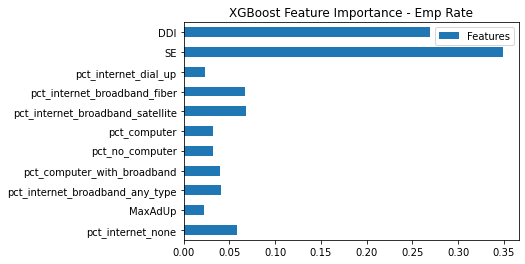

In [69]:
feature_importances = pd.DataFrame(regressor.feature_importances_, index = x_variables, columns = ['Features'])
feature_importances.plot.barh(title='XGBoost Feature Importance - Emp Rate')

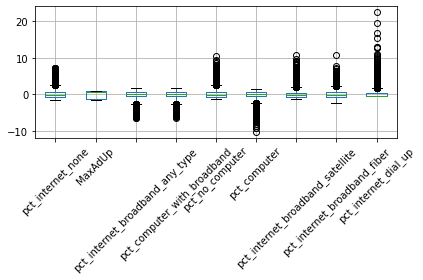

In [40]:
X_train_df = pd.DataFrame(X_train, columns = x_variables)
X_train_df.boxplot()
plt.xticks(rotation = 45)
plt.tight_layout()

In [39]:
X_train.shape

(52535, 9)

In [46]:
#remove outliers
threshold = 500
X_train_df = pd.DataFrame(X_train, columns = x_variables, index = y_train.index)
X_train_copy = X_train_df.copy()
X_train_copy = X_train_copy.sort_values('pct_internet_none').iloc[:-500,:]
X_train_copy = X_train_copy.sort_values('pct_internet_broadband_any_type').iloc[500:,:]
X_train_copy = X_train_copy.sort_values('pct_computer_with_broadband').iloc[500:,:]
X_train_copy = X_train_copy.sort_values('pct_no_computer').iloc[:-500,:]
X_train_copy = X_train_copy.sort_values('pct_computer').iloc[:-500,:]
X_train_copy = X_train_copy.sort_values('pct_internet_broadband_satellite').iloc[:-500,:]
X_train_copy = X_train_copy.sort_values('pct_internet_broadband_fiber').iloc[:-500,:]
X_train_copy = X_train_copy.sort_values('pct_internet_dial_up').iloc[:-500,:]
print(len(X_train_copy.index))
print(len(X_train_df.index))

48535
52535


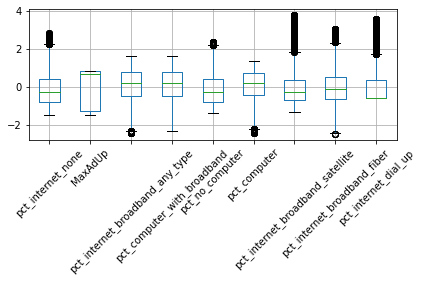

In [47]:
X_train_copy.boxplot()
plt.xticks(rotation = 45)
plt.tight_layout()

In [48]:
X_train_copy

,pct_internet_none,MaxAdUp,pct_internet_broadband_any_type,pct_computer_with_broadband,pct_no_computer,pct_computer,pct_internet_broadband_satellite,pct_internet_broadband_fiber,pct_internet_dial_up
tract_geoid,,,,,,,,,
48215022800,1.069225,0.821167,-0.653586,-0.682877,0.287228,-0.287228,1.654080,-2.476198,-0.586977
36047058400,0.223321,0.544312,0.059360,0.069626,0.407132,-0.407132,-0.718313,0.083968,-0.586977
18089042901,-0.834925,0.821167,0.943968,0.882387,-0.541416,0.541416,0.083817,0.083735,-0.586977
37183053107,-0.564903,0.682739,0.309200,0.364714,-0.407500,0.407500,-0.569182,0.083457,-0.586977
31033954900,0.362492,0.821167,-0.292930,-0.221661,0.297973,-0.297973,0.098452,0.083430,-0.586977
...,...,...,...,...,...,...,...,...,...
26111291602,0.641699,-1.405208,-0.767014,-0.683340,0.991787,-0.991787,-0.694814,0.311274,3.563523
39095009300,-0.012174,-1.405208,-0.064714,0.000583,-0.513047,0.513047,0.335494,0.422639,3.566586
4025001401,1.660877,-1.370602,-1.580336,-1.475381,0.667417,-0.667417,3.249652,-1.290607,3.569988


In [50]:
y_train_copy = y_train.loc[X_train_copy.index]

In [51]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
print('Parameters currently in use:\n')
pprint(regressor.get_params())
regressor.fit(X_train_copy, y_train_copy)
y_pred = regressor.predict(X_test)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 6.220494365768235
Mean Squared Error: 68.42984035929648
Root Mean Squared Error: 8.272233093868698


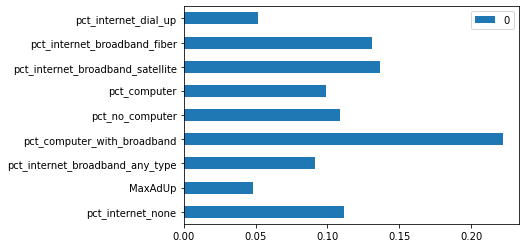

In [53]:
feature_importances = pd.DataFrame(regressor.feature_importances_, index = x_variables)
feature_importances.plot.barh()

In [80]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [81]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and us

e all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [82]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [83]:
y_pred = rf_random.predict(X_test)

In [84]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.950739442231869
Mean Squared Error: 64.17261282289702
Root Mean Squared Error: 8.010781037008627


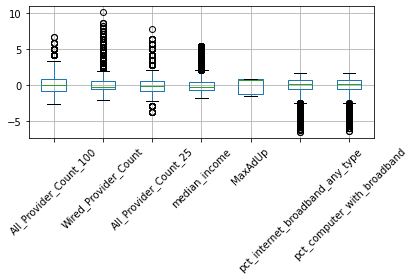

In [96]:
# baseline
y_variables = ['employment_rate']
x_variables = ['log_median_income']
X_train = data[x_variables]
y_train = data[y_variables]
X_test = test_data[x_variables]
y_test = test_data[y_variables]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
X_test

array([[-0.15803424],
       [-1.23938393],
       [-0.13763042],
       ...,
       [ 0.50898701],
       [ 1.86328512],
       [ 0.15825481]])

In [97]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
print('Parameters currently in use:\n')
pprint(regressor.get_params())
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [98]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 7.541726494209341
Mean Squared Error: 97.28201220671404
Root Mean Squared Error: 9.863164411420609
R Squared: 0.07997083666959463


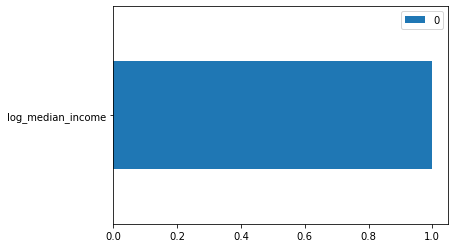

In [100]:
feature_importances = pd.DataFrame(regressor.feature_importances_, index = x_variables)
feature_importances.plot.barh()
feature_importances.T.to_clipboard()

In [86]:
pickle.dump(regressor, open('emp_rate_rf_baseline', 'wb'))

In [101]:
# vars based on feature importance
y_variables = ['employment_rate']
x_variables = ['pct_internet', 
                'pct_only_cellular',
                'pct_computing_device_no_internet',
              'pct_internet_broadband_satellite',
              'pct_computing_device_with_broadband',
              'log_median_income',  'pct_pop_foreign_born','pct_pop_lt_10k', 'pct_pop_10k_thru_15k',
              'pct_internet_none','pct_internet_broadband_any_type','pct_ages_lt_19']
X_train = data[x_variables]
y_train = data[y_variables]
X_test = test_data[x_variables]
y_test = test_data[y_variables]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
print('Parameters currently in use:\n')
pprint(regressor.get_params())
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [103]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 5.415691044669104
Mean Squared Error: 52.2157889872374
Root Mean Squared Error: 7.226049334680563
R Squared: 0.6831442580375334


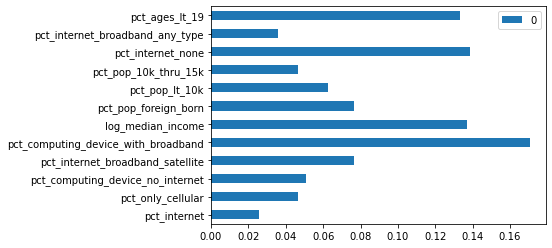

In [105]:
feature_importances = pd.DataFrame(regressor.feature_importances_, index = x_variables)
feature_importances.plot.barh()
feature_importances.to_clipboard()

In [91]:
pickle.dump(regressor, open('emp_rate_rf_feature_imp', 'wb'))

In [28]:
# vars based on user exporation
y_variables = ['employment_rate']
x_variables = ['pct_internet', 
                'pct_only_cellular',
                'pct_computing_device_no_internet',
              'pct_internet_broadband_satellite',
              'pct_computing_device_with_broadband',
              'log_median_income',  'pct_pop_foreign_born','pct_pop_lt_10k', 'pct_pop_10k_thru_15k',
              'pct_internet_broadband_any_type','pct_ages_lt_19', 'Wired_Provider_Count', 'pct_computing_device',
              'Ookla Median Download Speed (Mbps)','poverty_rate', 'pct_pop_80_to_84', 'median_age_male',
       'pct_pop_bachelors+', 'pct_pop_75_to_79', 'ave_household_size',
       'pct_pop_70_to_74', 'pct_pop_income_lt_30k', 'pct_pop_25_to_29','pct_pop_15_to_19',
       'median_age_female', 'pct_pop_ged', 'pct_ages_gt_50',
       'pct_pop_disability', 'pct_pop_30_to_34', 'median_age_overall']
# x_variables = [i for i in data.columns if i !='employment_rate']
X_train = data[x_variables]
y_train = data[y_variables]
X_test = test_data[x_variables]
y_test = test_data[y_variables]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
feature_importances.sort_values(by=0).tail(20).index

Index(['poverty_rate', 'pct_pop_80_to_84', 'median_age_male',
       'pct_pop_bachelors+', 'pct_pop_75_to_79', 'ave_household_size',
       'pct_pop_70_to_74', 'pct_pop_income_lt_30k', 'pct_pop_25_to_29',
       'pct_ages_lt_19', 'pct_pop_lt_10k', 'pct_pop_15_to_19',
       'median_age_female', 'pct_pop_ged', 'pct_ages_gt_50',
       'pct_pop_disability', 'pct_pop_30_to_34', 'median_age_overall', 'DDI',
       'SE'],
      dtype='object')

In [29]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
print('Parameters currently in use:\n')
pprint(regressor.get_params())
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 3.7494692048469207
Mean Squared Error: 24.492668513587155
Root Mean Squared Error: 4.949006820927524
R Squared: 0.8659332511702795


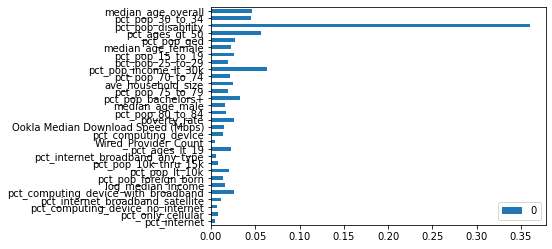

In [31]:
feature_importances = pd.DataFrame(regressor.feature_importances_, index = x_variables)

feature_importances.plot.barh()
feature_importances.to_clipboard()

In [32]:
pickle.dump(regressor, open('emp_rate_rf_user_exp', 'wb'))